# Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
from matplotlib import style 
import matplotlib.pyplot as plt 
import plotly.express as py 
style.use('ggplot')

import re

import nltk 
nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('porter_test')
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))

from pathlib import Path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package porter_test to
[nltk_data]     C:\Users\Tuan3\AppData\Roaming\nltk_data...
[nltk_data]   Package porter_test is already up-to-date!


# Read Data

In [2]:
df = pd.read_csv("data/test.csv")
df.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


# Viewing the distribution of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

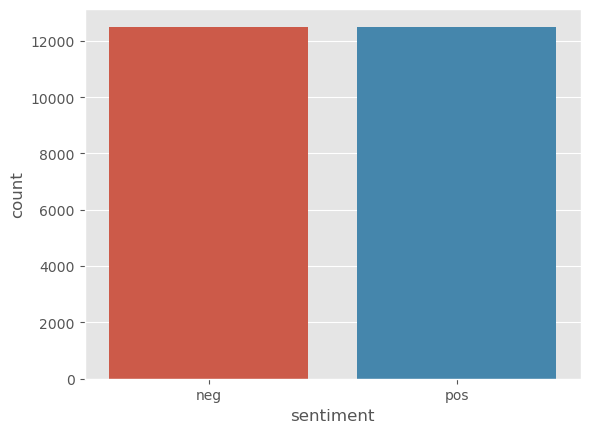

In [3]:
# Count the number of positive and negative reviews
df.info()
sb.countplot(x = "sentiment", data = df)

In [4]:
print(df['sentiment'].value_counts())

neg    12500
pos    12500
Name: sentiment, dtype: int64


In [5]:
# Adding an additional column that counts the number of words in each review
def word_count(text): 
    word_arr = text.split()
    i = 0
    for w in word_arr:
        i += 1
    return i

In [6]:
df['word_count'] = df['text'].apply(word_count)
df.head()

,text,sentiment,word_count
0,"My daughter liked it but I was aghast, that a ...",neg,142
1,I... No words. No words can describe this. I w...,neg,325
2,this film is basically a poor take on the old ...,neg,131
3,"This is a terrible movie, and I'm not even sur...",neg,156
4,First of all this movie is a piece of reality ...,pos,173


Text(0.5, 0.98, 'Word count of movie sentiments')

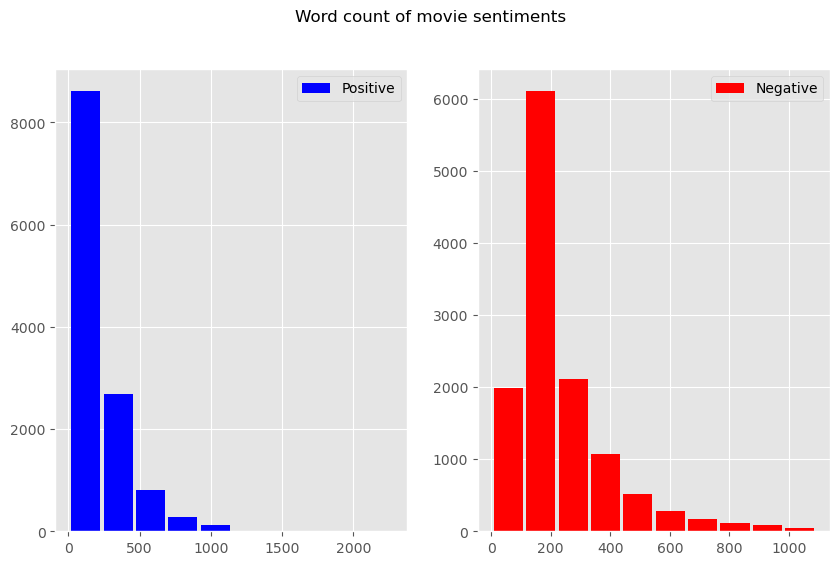

In [7]:
# Plotting a histogram on the word count
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
ax[0].hist(df[df['sentiment'] == 'pos']['word_count'], label = 'Positive', color = 'blue', rwidth = 0.9)
ax[0].legend(loc = 'upper right')
ax[1].hist(df[df['sentiment'] == 'neg']['word_count'], label = 'Negative', color = 'red', rwidth = 0.9)
ax[1].legend(loc = 'upper right')
fig.suptitle("Word count of movie sentiments")

In [8]:
# Vectorisation of binary sentiment
# positive = 2 ; negative = 1
df.sentiment.replace("pos", 2, inplace = True)
df.sentiment.replace("neg", 1, inplace = True)
df.head()

,text,sentiment,word_count
0,"My daughter liked it but I was aghast, that a ...",1,142
1,I... No words. No words can describe this. I w...,1,325
2,this film is basically a poor take on the old ...,1,131
3,"This is a terrible movie, and I'm not even sur...",1,156
4,First of all this movie is a piece of reality ...,2,173


# Cleaning up of the data

In the data, there are numerous text features that we do not want. So we create a function to remove `'<br />'`, `'.'`, `','`, `'!'`, `'?'`, `'"'`, `':'`, `'('`, `')'`, `'*'`, `stopwords`, `URLs`, `'#'` and `'@'` symbols. Moreover, we have to change the text to lowercase as well.

In [9]:
def cleaning(text):
    text = text.lower() # change to lowercase
    text = re.sub('<br />', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text_tokens = word_tokenize(text)
    filtered_tokens = []
    for w in text_tokens:
        if not w in stop_words or w == 'not':
            filtered_tokens.append(w)
    return " ".join(filtered_tokens)

In [10]:
df.text = df['text'].apply(cleaning)
df.head()

,text,sentiment,word_count
0,daughter liked aghast character movie smokes i...,1,142
1,words words describe try sake brave people sti...,1,325
2,film basically poor take old urban legend baby...,1,131
3,terrible movie im not even sure terrible ugly ...,1,156
4,first movie piece reality well realized artist...,2,173


In [11]:
# Remove duplicated entries
df = df.drop_duplicates('text')
df.head()

,text,sentiment,word_count
0,daughter liked aghast character movie smokes i...,1,142
1,words words describe try sake brave people sti...,1,325
2,film basically poor take old urban legend baby...,1,131
3,terrible movie im not even sure terrible ugly ...,1,156
4,first movie piece reality well realized artist...,2,173


In [12]:
# Count the remaining unique entries
print(df['sentiment'].value_counts())

2    12439
1    12360
Name: sentiment, dtype: int64


In [13]:
# Stemming of the data (the process of reducing a word to its root form)
def stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    words = [stemmer.stem(word) for word in tokens]
    data = " ".join(words)
    return data

In [14]:
cells = [stem(x) for x in df['text']]

count_value = 0

for x in df['text']:
    df.replace(x, cells[count_value], inplace = True)
    count_value += 1

In [15]:
df.head()

,text,sentiment,word_count
0,daughter like aghast charact movi smoke isnt a...,1,142
1,word word describ tri sake brave peopl stick k...,1,325
2,film basic poor take old urban legend babysitt...,1,131
3,terribl movi im not even sure terribl ugli one...,1,156
4,first movi piec realiti well realiz artist kin...,2,173


# Create a CSV file for cleaned dataset

In [16]:
filepath = Path('data/cleaned.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 